# Data Science Intern Challenge - Umar

### Question 1: Answers below the analysis

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36
1,2,92,925,90,1,cash,2017-03-03 17:38
2,3,44,861,144,1,cash,2017-03-14 4:23
3,4,18,935,156,1,credit_card,2017-03-26 12:43
4,5,18,883,156,1,credit_card,2017-03-01 4:35


In [6]:
df.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

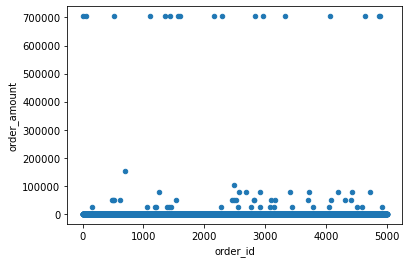

In [7]:
ax1 = df.plot.scatter(x="order_id", y="order_amount")

From this information we see that the majority of orders are below the 200k mark. We do see some influential points that can skew the AOV whuc are all 700k

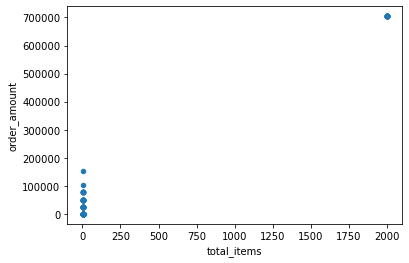

In [8]:
ax2 = df.plot.scatter(x="total_items", y="order_amount")

In [9]:
pd.value_counts(df["total_items"])

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

In [11]:
df["order_id"] = df.index

From this scatter plot and table, we can see that majority of our data ranges from item amounts of 1-8 while only 17 of these orders are from a very large order of 2000 items. Having these many items being ordered obviously means that the **order_amount** will be very large as well, thus influencing the AOV. 

In [16]:
df[df["order_amount"] == max(df["order_amount"])]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,15,42,607,704000,2000,credit_card,2017-03-07 4:00
60,60,42,607,704000,2000,credit_card,2017-03-04 4:00
520,520,42,607,704000,2000,credit_card,2017-03-02 4:00
1104,1104,42,607,704000,2000,credit_card,2017-03-24 4:00
1362,1362,42,607,704000,2000,credit_card,2017-03-15 4:00
1436,1436,42,607,704000,2000,credit_card,2017-03-11 4:00
1562,1562,42,607,704000,2000,credit_card,2017-03-19 4:00
1602,1602,42,607,704000,2000,credit_card,2017-03-17 4:00
2153,2153,42,607,704000,2000,credit_card,2017-03-12 4:00
2297,2297,42,607,704000,2000,credit_card,2017-03-07 4:00


From this queried df, we see that the max value that the shoes are bought for are 704000 and there are 17 of these entries. These extremely large prices does alter the AOV value. Mean is affected by outliers and we can notice that there are some entries that are exactly the same. Mean being affected by data that doesn't represent the sample data allows for skewing of the results so that the mean is no longer representative of the data set

In [21]:
duplicateRowsDF = df[df.duplicated(['shop_id', 'user_id', 'order_amount', 'total_items', 'payment_method', 'created_at'], keep='first')]
print(duplicateRowsDF)

      order_id  shop_id  user_id  order_amount  total_items payment_method  \
2297      2297       42      607        704000         2000    credit_card   
2969      2969       42      607        704000         2000    credit_card   
3332      3332       42      607        704000         2000    credit_card   
4056      4056       42      607        704000         2000    credit_card   
4646      4646       42      607        704000         2000    credit_card   

           created_at  
2297  2017-03-07 4:00  
2969  2017-03-28 4:00  
3332  2017-03-24 4:00  
4056  2017-03-28 4:00  
4646  2017-03-02 4:00  


Wow ! From this discovery, we see that there are 5 of the same entries in the data set, that occured at the same time, by the same **user**. These duplicate entries especially with the __order_amount__ being of that size "704000" can skew our metrics. Because of this, the AOV value has been skewed. We can fix this by taking away the duplicate occurences that occur.

### Question 1 - Answers

##### 1a)  Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.     
  
What is wrong with the calculation is that the AOV is calculated by just taking the average of the "**order_amount**" column. What fails to get the accurate AOV value is that, it is caluclated without taking out factors that is driving up the calulation. We see that there are duplicate entries which can be a result of misentry in the data set. These extra entries with a very large **order_amount** are driving up the AOV. A better way to evaluate this data is by using another measure of central tendency that does not get affected by outliers.  

##### 1b)  What metric would you report for this dataset?

I would use Median. This is because if we were to use the Mean (_AOV_) then our results wouldve been skewed from very large entries. So using Median wouldn't be influenced by the outliers in the data

##### 1c)  What is its value?
From the calculation below, we can see that the **Median** value is **284**


In [23]:
median = df["order_amount"].median()
print("The median is:", median)

The median is: 284.0


## Question 2 -  SQL 

2a) How many orders were shipped by Speedy Express in total?  
Ans: 54

SELECT COUNT(DISTINCT("OrderID")) AS "Total Orders By Speedy Express" FROM Orders O 
JOIN Shippers S
ON O.ShipperID = S.ShipperID
WHERE O.ShipperID = 1

2b) What is the last name of the employee with the most orders?  
Ans: Peacock

SELECT LastName FROM Employees 
WHERE EmployeeID = (SELECT E.EmployeeID FROM Orders O JOIN Employees E
ON E.EmployeeID = O.EmployeeID
GROUP BY E.EmployeeID
ORDER BY COUNT(OrderID) DESC LIMIT 1)

2c) What product was ordered the most by customers in Germany?  
Ans: Gorgonzola Telino

SELECT ProductName FROM Products 
WHERE ProductID = (SELECT P.ProductID FROM Customers C JOIN Orders O JOIN OrderDetails D JOIN Products P
ON C.CustomerID = O.CustomerID
AND O.OrderID = D.OrderID
AND D.ProductID = P.ProductID
WHERE C.Country = 'Germany'
GROUP BY P.ProductID
ORDER BY COUNT(P.ProductID) DESC LIMIT 1)